Machine Learning Project Notebook

Run the following code to upload an image file from your local system to the Colab environment.

Mounted at /content/gdrive
Found 7580 images belonging to 2 classes.
Found 204 images belonging to 2 classes.
Epoch 1/11
237/237 [==============================] - 1419s 6s/step - loss: 0.5798 - accuracy: 0.7111 - val_loss: 0.5522 - val_accuracy: 0.7451
Epoch 2/11
237/237 [==============================] - 76s 323ms/step - loss: 0.4034 - accuracy: 0.8247 - val_loss: 0.2257 - val_accuracy: 0.9167
Epoch 3/11
237/237 [==============================] - 81s 343ms/step - loss: 0.2967 - accuracy: 0.8781 - val_loss: 0.2062 - val_accuracy: 0.9314
Epoch 4/11
237/237 [==============================] - 78s 328ms/step - loss: 0.2572 - accuracy: 0.8987 - val_loss: 0.1135 - val_accuracy: 0.9608
Epoch 5/11
237/237 [==============================] - 78s 329ms/step - loss: 0.2234 - accuracy: 0.9104 - val_loss: 0.2094 - val_accuracy: 0.9412
Epoch 6/11
237/237 [==============================] - 78s 328ms/step - loss: 0.1910 - accuracy: 0.9274 - val_loss: 0.0887 - val_accuracy: 0.9461
Epoch 7/11
237/237 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


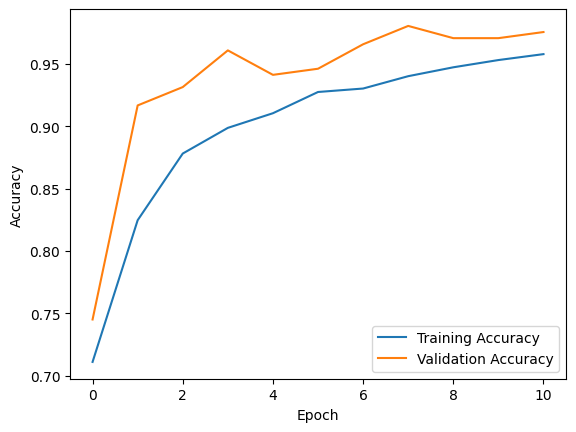

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)
tf.random.set_seed(42)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    epochs=11,
    validation_data=validation_generator
)

# Save the model
model.save('/content/gdrive/My Drive/Colab Notebooks/cat_dog_classifier_model.h5')

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


After uploading the image, you can use the code provided in the previous response to perform image recognition.

this version uses ResNet50


Mounted at /content/gdrive
Random Image Path: /content/gdrive/My Drive/Colab Notebooks/test/Copy of flickr_dog_000038.jpg
1/1 [==============================] - 0s 74ms/step
Image Path: /content/gdrive/My Drive/Colab Notebooks/test/Copy of flickr_dog_000038.jpg
Prediction: This image is a dog! (Confidence: 0.9981)


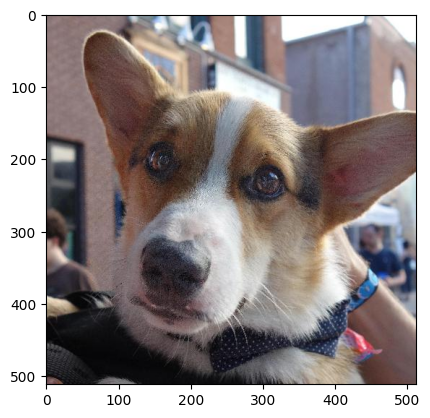

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
i = 0;
import os
import random
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
base_path = '/content/gdrive/My Drive/Colab Notebooks/test'

# List all files
all_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            all_files.append(os.path.join(root, file))

if all_files:
    # Select a random image
    random_image_path = random.choice(all_files)
    print("Random Image Path:", random_image_path)
else:
    print("No image files found in the specified directory.")

# Load the model
loaded_model = tf.keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/cat_dog_classifier_model.h5')

# Make predictions
img = tf.keras.preprocessing.image.load_img(random_image_path, target_size=(150, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0
img_array = tf.expand_dims(img_array, 0)

predictions = loaded_model.predict(img_array)

print("Image Path:", random_image_path)

threshold = 0.5

if predictions[0][0] <= threshold:
    predicted_class = "This image is a cat!"
    confidence = 1 - predictions[0][0]
else:
    predicted_class = "This image is a dog!"
    confidence = predictions[0][0]

print(f"Prediction: {predicted_class} (Confidence: {confidence:.4f})")

img = mpimg.imread(random_image_path)
imgplot = plt.imshow(img)
plt.show()

Mounted at /content/gdrive
Found 200 images belonging to 2 classes.
7/7 [==============================] - 26s 4s/step


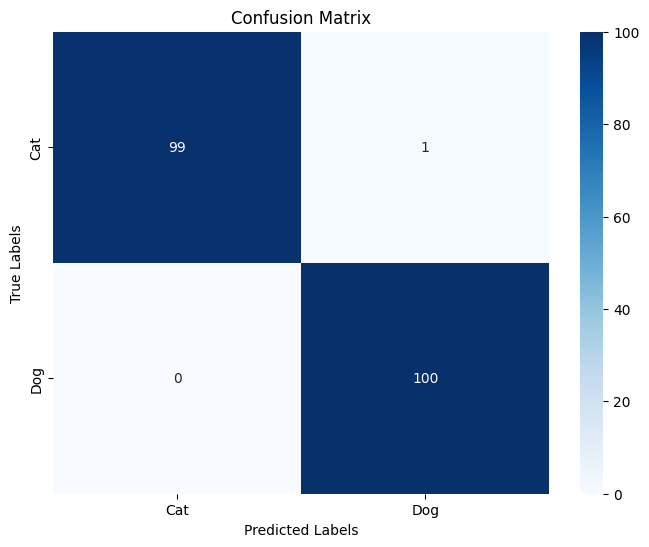


Classification Report:
              precision    recall  f1-score   support

         Cat       1.00      0.99      0.99       100
         Dog       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Load the trained model
drive.mount('/content/gdrive', force_remount=True)
model = load_model('/content/gdrive/My Drive/Colab Notebooks/cat_dog_classifier_model.h5')
test_data_path = '/content/gdrive/My Drive/Colab Notebooks/test'
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and prepare the test data
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Get predictions
predictions = model.predict(test_generator)

# Convert predictions
predicted_labels = np.round(predictions).flatten()
true_labels = test_generator.classes

# Create confusion matrix
conf_mat = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels, target_names=['Cat', 'Dog']))

KNN model

Mounted at /content/gdrive
1 neighbors:
training accuracy: 1.0000 - validation accuracy: 0.7454 - time taken: 6.05 seconds

3 neighbors:
training accuracy: 0.8922 - validation accuracy: 0.7625 - time taken: 4.48 seconds

5 neighbors:
training accuracy: 0.8633 - validation accuracy: 0.7770 - time taken: 4.52 seconds

7 neighbors:
training accuracy: 0.8527 - validation accuracy: 0.7691 - time taken: 6.28 seconds

9 neighbors:
training accuracy: 0.8452 - validation accuracy: 0.7823 - time taken: 5.34 seconds

11 neighbors:
training accuracy: 0.8389 - validation accuracy: 0.7652 - time taken: 4.54 seconds



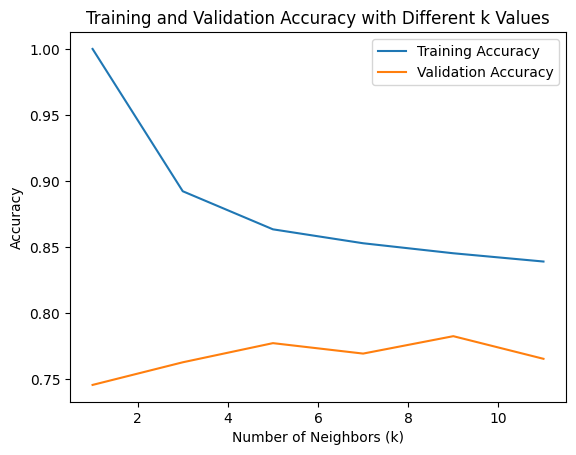

Accuracy: 77.84%


['/content/gdrive/My Drive/Colab Notebooks/knn_model.joblib']

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
from google.colab import drive
import time

drive.mount('/content/gdrive', force_remount=True)
def load_and_preprocess_data(root_dir):
    images = []
    labels = []

    for label, class_name in enumerate(['cat', 'dog']):
        class_dir = os.path.join(root_dir, class_name)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (64, 64))
            images.append(image.flatten())
            labels.append(label)

    return np.array(images), np.array(labels)

root_directory = "/content/gdrive/My Drive/Colab Notebooks/train"
X, y = load_and_preprocess_data(root_directory)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Number of neighbors
k_values = [1, 3, 5, 7, 9, 11]
train_accuracies = []
validation_accuracies = []
time_taken = 0
for k_value in k_values:
    # Train with a specific k value
    start_time = time.time()
    knn_model = KNeighborsClassifier(n_neighbors=k_value)
    knn_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = knn_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the validation set
    y_val_pred = knn_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(val_accuracy)
    end_time = time.time()

    # Calculate the time taken for the current value of k
    elapsed_time = (end_time - start_time)
    time_taken = elapsed_time

    print(k_value, "neighbors:")
    print(f"training accuracy: {train_accuracy:.4f} - validation accuracy: {val_accuracy:.4f} - time taken: {time_taken:.2f} seconds\n")

# Plot the accuracy
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Different k Values')
plt.legend()
plt.show()

best_k = k_values[np.argmax(validation_accuracies)]
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_train, y_train)

# Make predictions
y_pred = final_knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
model_filename = "/content/gdrive/My Drive/Colab Notebooks/knn_model.joblib"
joblib.dump(final_knn_model, model_filename)

Mounted at /content/gdrive
Random Image Path: /content/gdrive/My Drive/Colab Notebooks/test/Copy of flickr_cat_000082.jpg
The image is predicted to be a cat.


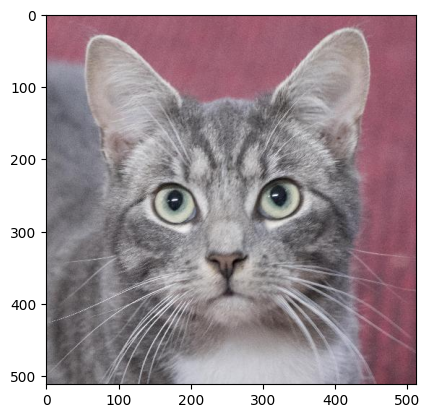

In [ ]:
import cv2
import joblib
import glob
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive

# Load the model
drive.mount('/content/gdrive', force_remount=True)
model_filename = "/content/gdrive/My Drive/Colab Notebooks/knn_model.joblib"
knn_model = joblib.load(model_filename)
base_path = "/content/gdrive/My Drive/Colab Notebooks/test"

all_files = []

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            all_files.append(os.path.join(root, file))

if all_files:
    # Select a random image
    random_image_path = random.choice(all_files)
    print("Random Image Path:", random_image_path)
else:
    print("No image files found in the specified directory.")

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (64, 64))
    flattened_image = image.flatten()
    return flattened_image.reshape(1, -1)

def predict_and_display_random_image(image_dir):

    input_image = preprocess_image(random_image_path)

    # Make predictions
    predicted_class = knn_model.predict(input_image)

    # Display the prediction
    if predicted_class == 0:
        print("The image is predicted to be a cat.")
    elif predicted_class == 1:
        print("The image is predicted to be a dog.")
    else:
        print("Unable to make a prediction.")

    img = mpimg.imread(random_image_path)
    imgplot = plt.imshow(img)
    plt.show()


predict_and_display_random_image(random_image_path)

Mounted at /content/gdrive
Confusion Matrix:
[[79 10]
 [41 98]]


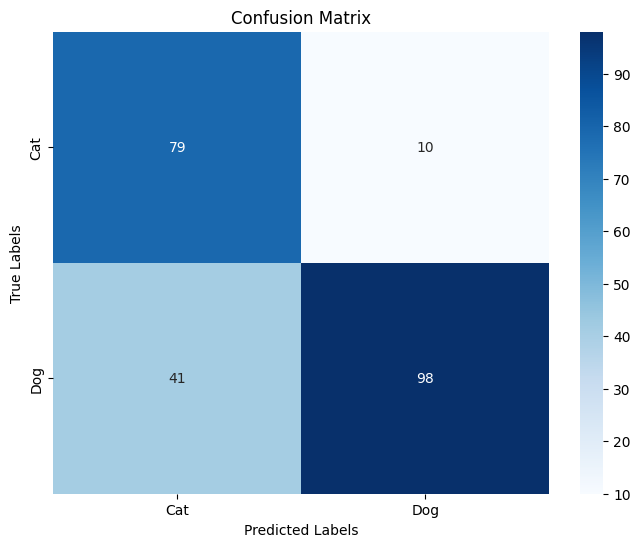


Classification Report:
              precision    recall  f1-score   support

         Cat       0.66      0.89      0.76        89
         Dog       0.91      0.71      0.79       139

    accuracy                           0.78       228
   macro avg       0.78      0.80      0.77       228
weighted avg       0.81      0.78      0.78       228



In [ ]:
import cv2
import joblib
import glob
import random
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive

# Load the model
drive.mount('/content/gdrive', force_remount=True)
model_filename = "/content/gdrive/My Drive/Colab Notebooks/knn_model.joblib"
knn_model = joblib.load(model_filename)

def preprocess_image(image_path):

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (64, 64))
    flattened_image = image.flatten()
    return flattened_image.reshape(1, -1)

def evaluate_model_on_test_set(X_test, y_test):
    true_labels = []
    predicted_labels = []

    for i in range(len(X_test)):
        # Predict
        predicted_label = knn_model.predict(X_test[i].reshape(1, -1))[0]
        true_label = y_test[i]

        predicted_labels.append(predicted_label)
        true_labels.append(true_label)

    return true_labels, predicted_labels

test_image_directory = "/content/gdrive/My Drive/Colab Notebooks/train"



# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

# Evaluate the model
true_labels, predicted_labels = evaluate_model_on_test_set(X_test, y_test)

# Confusion matrix
conf_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_mat)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels, target_names=['Cat', 'Dog']))